# **statistics part2**

1. What is hypothesis testing in statistics?
- A statistical method used to make decisions or inferences about population parameters using sample data.

2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
- Null Hypothesis (H₀): Assumes no effect or no difference.

- Alternative Hypothesis (H₁): Assumes there is an effect or difference.
They are opposite statements tested in hypothesis testing.

3. What is the significance level in hypothesis testing, and why is it important?
- The significance level (α) is the threshold for rejecting the null hypothesis, commonly set at 0.05. It controls the probability of making a Type 1 error.

4. What does a P-value represent in hypothesis testing?
- The P-value is the probability of observing the sample result (or more extreme) if the null hypothesis is true.

5. How do you interpret the P-value in hypothesis testing?
- If P-value ≤ α: Reject H₀ (evidence supports H₁)

- If P-value > α: Do not reject H₀ (insufficient evidence)

6. What are Type 1 and Type 2 errors in hypothesis testing?
- Type 1 Error (α): Rejecting H₀ when it is true.

- Type 2 Error (β): Not rejecting H₀ when H₁ is true.

7. What is the difference between a one-tailed and a two-tailed test in hypothesis testing?
- One-tailed test: Tests for effect in one direction only.

- Two-tailed test: Tests for effect in both directions.

8. What is the Z-test, and when is it used in hypothesis testing?
- A Z-test is used to test population means when the population variance is known and the sample size is large (n ≥ 30).

9. How do you calculate the Z-score, and what does it represent in hypothesis testing?
- Z = (sample_mean - population_mean) / (std_dev / √n)
It shows how many standard deviations a sample mean is from the population mean.

10. What is the T-distribution, and when should it be used instead of the normal distribution?
- Used when the sample size is small (n < 30) and population standard deviation is unknown. It has heavier tails than the normal distribution.

11. What is the difference between a Z-test and a T-test?
- Z-test: Used when population standard deviation is known and large sample size.

- T-test: Used when population standard deviation is unknown and sample size is small.

12. What is the T-test, and how is it used in hypothesis testing?
- A statistical test used to compare means (one-sample, two-sample, or paired) when population variance is unknown.

13. What is the relationship between Z-test and T-test in hypothesis testing?
Both test means, but:

- Use Z-test when σ is known or n is large.

- Use T-test when σ is unknown and n is small.

14. What is a confidence interval, and how is it used to interpret statistical results?
- A range around a sample statistic that likely contains the population parameter. It helps estimate the parameter with a given confidence level (e.g., 95%).

15. What is the margin of error, and how does it affect the confidence interval?
- The amount added/subtracted from the sample statistic to create the interval. Larger margin = wider interval = less precise estimate.

16. How is Bayes' Theorem used in statistics, and what is its significance?
- It updates the probability of a hypothesis based on new evidence. It’s useful in decision-making, diagnostics, and machine learning.

17. What is the Chi-square distribution, and when is it used?
- A skewed distribution used in tests for variance, independence, and goodness of fit, especially for categorical data.

18. What is the Chi-square goodness of fit test, and how is it applied?
- It tests if observed frequencies match expected frequencies. Used to assess how well a model fits the data.

19. What is the F-distribution, and when is it used in hypothesis testing?
- A right-skewed distribution used to compare variances or in ANOVA tests.

20. What is an ANOVA test, and what are its assumptions?
- Analysis of Variance (ANOVA) compares means of 3 or more groups.
Assumptions:

  - Normal distribution

  - Equal variances

  - Independent observations

21. What are the different types of ANOVA tests?
- One-way ANOVA: One factor

- Two-way ANOVA: Two factors

- Repeated Measures ANOVA: Same subjects over time

22. What is the F-test, and how does it relate to hypothesis testing?
- It compares two variances or models. The test statistic follows an F-distribution. Commonly used in ANOVA.

# **Practical_questions 2**

1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results

In [1]:
import numpy as np
from scipy.stats import norm

sample = np.random.normal(100, 15, 30)
population_mean = 100
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

z = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Z-Statistic:", z)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Z-Statistic: -0.06317913294371964
P-Value: 0.9496238610763748
Fail to reject the null hypothesis.


2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python

In [2]:
from scipy.stats import ttest_1samp
import numpy as np

data = np.random.normal(loc=52, scale=10, size=50)
t_stat, p_value = ttest_1samp(data, popmean=50)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 1.1875981400781024
P-Value: 0.24071687528669072


3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean

In [3]:
from scipy.stats import norm
import numpy as np

sample = np.array([52, 49, 51, 50, 53, 48])
pop_mean = 50
sample_mean = np.mean(sample)
std_dev = np.std(sample, ddof=1)
n = len(sample)

z = (sample_mean - pop_mean) / (std_dev / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Z-Score:", z)
print("P-Value:", p_value)


Z-Score: 0.6546536707079771
P-Value: 0.5126907602619235


4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot

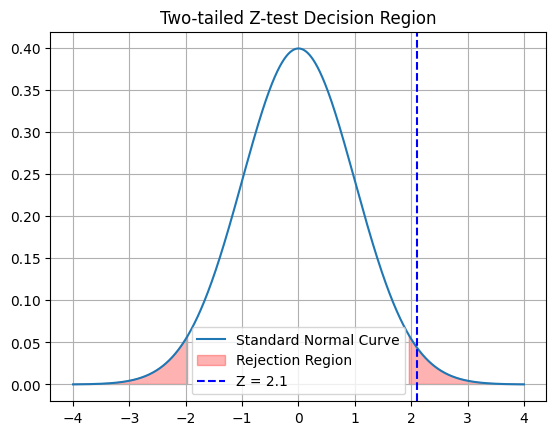

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

z = 2.1  # example z-score
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y, label='Standard Normal Curve')
plt.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(z, color='blue', linestyle='--', label=f'Z = {z}')
plt.title('Two-tailed Z-test Decision Region')
plt.legend()
plt.grid()
plt.show()


5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

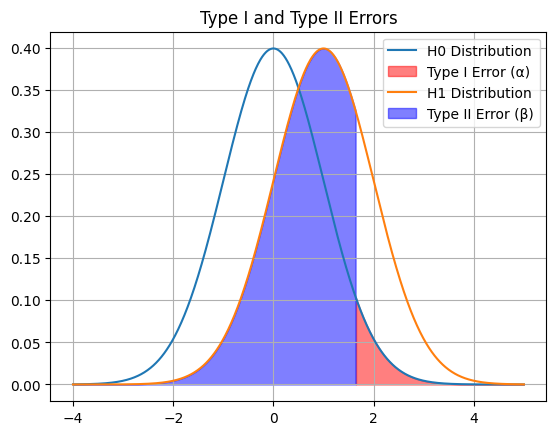

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_errors(mu0=0, mu1=1, sigma=1, alpha=0.05):
    x = np.linspace(-4, 5, 1000)
    z_critical = norm.ppf(1 - alpha)

    # Type I error
    y0 = norm.pdf(x, mu0, sigma)
    plt.plot(x, y0, label='H0 Distribution')
    plt.fill_between(x, y0, where=(x > z_critical), color='red', alpha=0.5, label='Type I Error (α)')

    # Type II error
    y1 = norm.pdf(x, mu1, sigma)
    plt.plot(x, y1, label='H1 Distribution')
    plt.fill_between(x, y1, where=(x <= z_critical), color='blue', alpha=0.5, label='Type II Error (β)')

    plt.legend()
    plt.title("Type I and Type II Errors")
    plt.grid()
    plt.show()

plot_errors()


6. Write a Python program to perform an independent T-test and interpret the results

In [6]:
from scipy.stats import ttest_ind
import numpy as np

group1 = np.random.normal(100, 10, 30)
group2 = np.random.normal(105, 12, 30)

t_stat, p_value = ttest_ind(group1, group2)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -2.53684033731545
P-Value: 0.013898494845699228


7. Perform a paired sample T-test using Python and visualize the comparison results

Paired T-Test Statistic: -3.567800076000526
P-Value: 0.001274982235057333


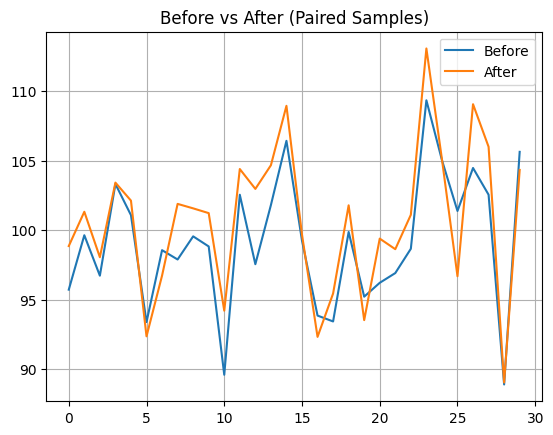

In [7]:
from scipy.stats import ttest_rel
import numpy as np
import matplotlib.pyplot as plt

before = np.random.normal(100, 5, 30)
after = before + np.random.normal(2, 2, 30)

t_stat, p_value = ttest_rel(before, after)

print("Paired T-Test Statistic:", t_stat)
print("P-Value:", p_value)

plt.plot(before, label='Before')
plt.plot(after, label='After')
plt.legend()
plt.title("Before vs After (Paired Samples)")
plt.grid()
plt.show()


8. Simulate data and perform both Z-test and T-test, then compare the results using Python

In [8]:
from scipy.stats import norm, ttest_1samp
import numpy as np

data = np.random.normal(50, 10, 20)
pop_mean = 50
sample_mean = np.mean(data)
std_dev = np.std(data, ddof=1)
n = len(data)

# Z-test
z = (sample_mean - pop_mean) / (std_dev / np.sqrt(n))
p_z = 2 * (1 - norm.cdf(abs(z)))

# T-test
t_stat, p_t = ttest_1samp(data, pop_mean)

print("Z-test:", z, "P-value:", p_z)
print("T-test:", t_stat, "P-value:", p_t)


Z-test: 0.743343236654231 P-value: 0.4572739010642053
T-test: 0.7433432366542311 P-value: 0.4663669734730935


9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance

In [9]:
import numpy as np
from scipy.stats import norm

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    z = norm.ppf(1 - (1 - confidence) / 2)
    margin = z * (std / np.sqrt(n))
    return mean - margin, mean + margin

data = np.random.normal(100, 10, 50)
ci = confidence_interval(data)
print("95% Confidence Interval:", ci)


95% Confidence Interval: (np.float64(98.7216239074347), np.float64(104.37668707164794))


10. Write a Python program to calculate the margin of error for a given confidence level using sample data

In [10]:
import numpy as np
from scipy.stats import norm

data = np.random.normal(100, 15, 40)
n = len(data)
std = np.std(data, ddof=1)
z = norm.ppf(0.975)  # for 95% confidence
margin_of_error = z * (std / np.sqrt(n))

print("Margin of Error:", margin_of_error)


Margin of Error: 4.8153857190917275


11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process

In [11]:
def bayes_theorem(prior_a, likelihood_b_given_a, prior_not_a, likelihood_b_given_not_a):
    numerator = likelihood_b_given_a * prior_a
    denominator = numerator + (likelihood_b_given_not_a * prior_not_a)
    posterior = numerator / denominator
    return posterior

# Example values
prior_a = 0.01  # disease prevalence
likelihood_b_given_a = 0.99  # test positive if has disease
prior_not_a = 0.99
likelihood_b_given_not_a = 0.05  # false positive

posterior = bayes_theorem(prior_a, likelihood_b_given_a, prior_not_a, likelihood_b_given_not_a)
print("Probability of disease given a positive test:", posterior)


Probability of disease given a positive test: 0.16666666666666669


12. Perform a Chi-square test for independence between two categorical variables in Python

In [12]:
import pandas as pd
import scipy.stats as stats

data = [[30, 10], [20, 40]]
chi2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-square Statistic:", chi2)
print("P-Value:", p)
print("Expected Frequencies:\n", expected)


Chi-square Statistic: 15.041666666666666
P-Value: 0.00010516355403363098
Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats

observed = np.array([[30, 10], [20, 40]])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Expected Frequencies:\n", expected)


Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution

In [14]:
import scipy.stats as stats
import numpy as np

observed = [18, 22, 20, 25, 15]
expected = [20, 20, 20, 20, 20]

chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)
print("Chi-square Statistic:", chi2)
print("P-value:", p)


Chi-square Statistic: 2.9
P-value: 0.5746972058298043
